# 🌟 Assignment 2. Operation "AI GeoGuessr"

### Deadline: Friday, October 24, 2025, 11:59:00 PM CET (GMT +2)

## 🎯 Mission Overview

The operation consists of two independent missions. Similar to the previous operation, students are required to solve the tasks by achieving the required score and answering the follow-up questions.

## 🧪 Neural Networks and Unsupervised Learning

1. **Mission 2.1 (Supervised Learning)**: 
	- Solve a supervised learning problem using a multilayer perceptron (MLP).

2. **Mission 2.2 (Unsupervised Learning)**:
	- Given an unlabeled dataset, your task is to cluster similar data points and achieve 100% clustering accuracy. You will not have access to the true labels, but you can verify your cluster assignments using the Kaggle competition provided.

## 📝 Delivery Format (Blackboard)

Please submit **two files**:
1. The completed Jupyter notebook.
2. The solution for the second dataset as a CSV file with two `int` columns: `['ID', 'cluster']`.

## Kaggle details
- Invitation link: https://www.kaggle.com/t/dfb72837bdb346449768b8f6ce50b6dc
- Kaggle is a popular platform for data science competitions.
- It allows us to create a Private competition where you can submit your solutions and verify whether you are thinking in the right direction.
- The results of the competition is visible only to the competition participants. 
- We will not grade the submissions on Kaggle, we set it up to let you check your clustering.
- You still have to deliver the `.csv` file of the solution and the complete `.ipynb` notebook with discussions and solution code.  

> Good luck, comrade!

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 🧠 Mission 2.1: Decoding SkyNet's Neural Encryption **(using Neural Networks)**

### 🌐 The Discovery
The dataset consists of the same "Synapse Cipher" data from Assignment 1.

### 🎯 Your Mission
1. Implement a multilayer perceptron (MLP) using one of the following frameworks: Keras, PyTorch, or TensorFlow.
2. Solve the non-linear problem without manual feature engineering.
3. Predict SkyNet's binary decisions (0 or 1) based on paired signals.
4. Improve performance by using techniques such as learning rate scheduling, selecting a good optimizer, and fine-tuning hyperparameters.

> Note: There are no restrictions on the tricks you can use — Have fun :) 

### 📊 Formal Requirements
1. **Implementation**:
   - Develop a Neural Network using predefined functions/layers.
   - Use one of the popular frameworks: Keras, PyTorch, or TensorFlow.
   - Implement a manual learning rate scheduler with warmup and cosine decay.

2. **Performance**: Achieve at least **0.92** accuracy on the test set.

3. **Discussion**:
   - How can you make sure the results are reproduable?
   - Visualize the network's architecture and decision boundary.
   - Which optimizer did you choose? Discuss the differences between SGD and Adam.
   - Plot the learning rate curve. Did the learning rate scheduling improve performance? Why or why not?
   - Conduct a simple ablation study of each architectural and optimization choice concerning test accuracy.

In [ ]:
from sklearn.preprocessing import StandardScaler
# Divide data
data = pd.read_csv('nn_data.csv')
train = data[data['split'] == 'train']
test = data[data['split'] == 'test']

Y_train = train['y']
Y_test = test['y']
X_train = train.drop(columns=['y', 'split'])
X_test  = test.drop(columns=['y', 'split'])

Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)

print("train: ", X_train.describe())
print ("test: ", X_test.describe())

train:                 x0          x1
count  500.000000  500.000000
mean    -0.031582    0.011981
std      1.008421    1.008450
min     -3.357624   -3.339251
25%     -0.667110   -0.703898
50%     -0.001538    0.032147
75%      0.618232    0.720423
max      2.757086    2.998959
test:                 x0          x1
count  500.000000  500.000000
mean     0.031282    0.059412
std      0.963474    1.011516
min     -3.005818   -2.796757
25%     -0.644394   -0.623349
50%      0.066929    0.070797
75%      0.684761    0.776648
max      3.432810    3.405747


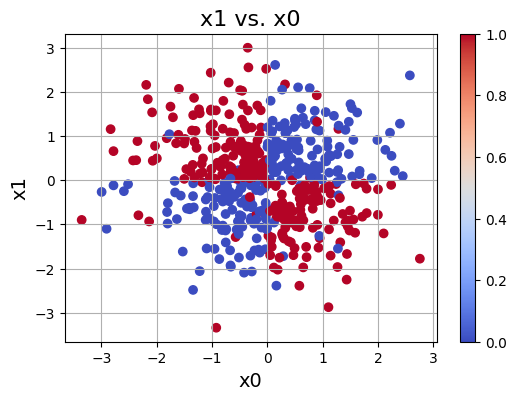

In [824]:
plt.figure(figsize=(6, 4))
plt.scatter(train['x0'], train['x1'], c=train['y'], cmap='coolwarm')
plt.grid(True)
plt.xlabel('x0', fontsize=14)
plt.ylabel('x1', fontsize=14)
plt.title('x1 vs. x0', fontsize=16)
plt.colorbar()
plt.show()


In [825]:
#optimizers, adam, stokastisk descent
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.random import set_seed
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras import backend as K

from keras import Input
import random

random.seed(42) # Python random
np.random.seed(42) # Numpy random
set_seed(42) # Tensorflow random

# Set up model
model = Sequential()
model.add(Input(shape=(2,)))
model.add(Dense(8, activation='tanh', name = "dense_1"))
model.add(Dense(4, activation='tanh', name = "dense_2"))
model.add(Dense(1, activation="sigmoid", name = "predictions"))

# Learning rate scheduler with warmup and cosine decay.
def learning_rate_scheduler(epoch, warmup=10, total_epochs=100, lr_min=0.001, lr_max=0.01):
	if epoch < warmup:
		return lr_min + (lr_max - lr_min) * (epoch + 1)/warmup
	else:
		progress = (epoch - warmup)/(total_epochs - warmup)
		return lr_min + 0.5 * (lr_max - lr_min) * (1 + np.cos(np.pi * progress))

warmup = 10
total_epochs = 150
lr_min = 0.001
lr_max = 0.01

lr_callback = LearningRateScheduler(
    lambda epoch: learning_rate_scheduler(epoch, warmup=warmup, total_epochs=total_epochs, lr_min=lr_min, lr_max=lr_max),
    verbose=1
)

# Train
model.compile(
	optimizer="adam",
	loss="binary_crossentropy",
	metrics=["accuracy"]
)
history = model.fit(
	X_train, Y_train,
 	epochs=total_epochs,
  callbacks=[lr_callback],
  batch_size=16
)

loss, acc = model.evaluate(X_test, Y_test)
print("Accuracy: ", acc)



Epoch 1: LearningRateScheduler setting learning rate to 0.0019000000000000002.
Epoch 1/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 824us/step - accuracy: 0.4940 - loss: 0.7180 - learning_rate: 0.0019

Epoch 2: LearningRateScheduler setting learning rate to 0.0028000000000000004.
Epoch 2/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step - accuracy: 0.5520 - loss: 0.6943 - learning_rate: 0.0028

Epoch 3: LearningRateScheduler setting learning rate to 0.0037.
Epoch 3/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step - accuracy: 0.5660 - loss: 0.6806 - learning_rate: 0.0037

Epoch 4: LearningRateScheduler setting learning rate to 0.0046.
Epoch 4/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step - accuracy: 0.5760 - loss: 0.6666 - learning_rate: 0.0046

Epoch 5: LearningRateScheduler setting learning rate to 0.0055000000000000005.
Epoch 5/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - accuracy: 0.6840 - loss: 0.6440 - learning_rate: 0.0055

Epoch 6: LearningRateScheduler setting learning rate to 0.0064.
Epoch 6/15

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step


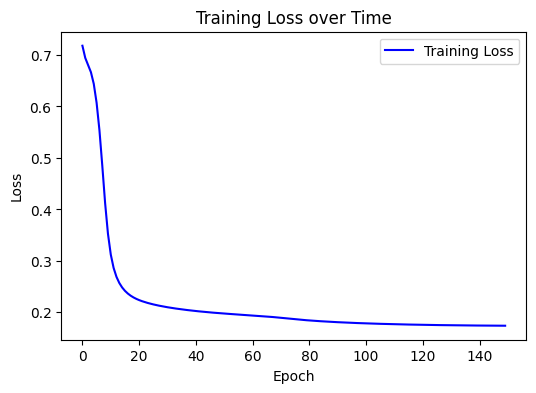

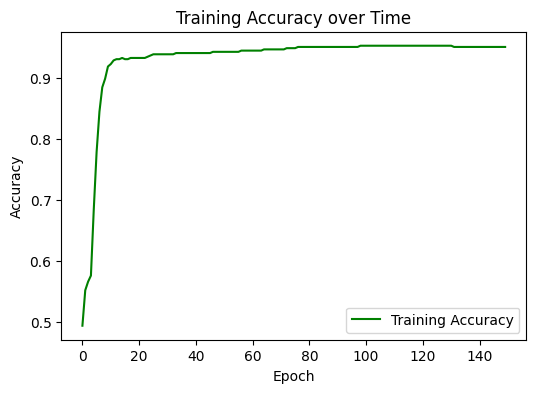

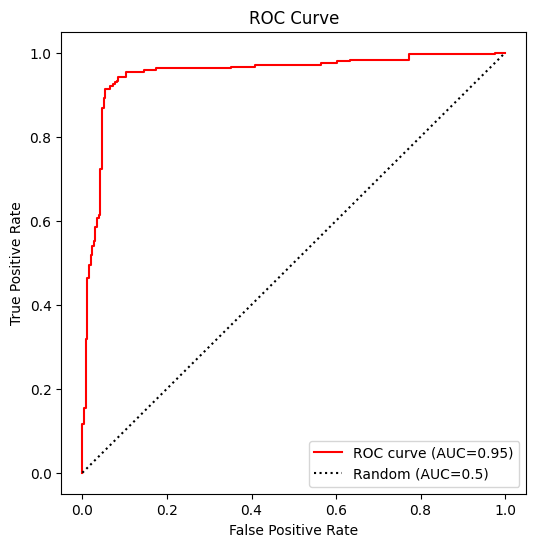

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 197 (792.00 B)

 Trainable params: 65 (260.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 132 (532.00 B)

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 595us/step


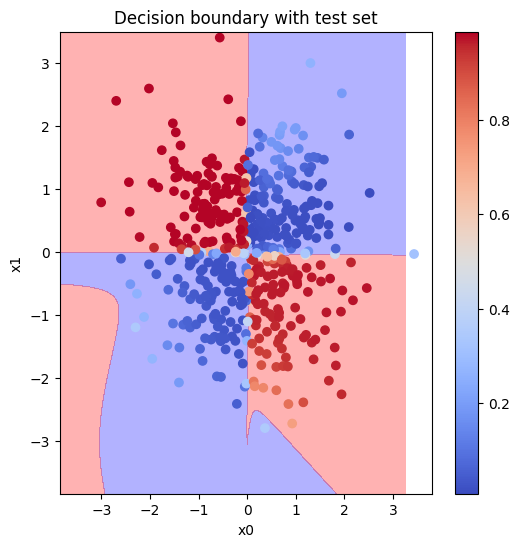

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib.colors import ListedColormap, BoundaryNorm


# Evaluate
Y_preds = model.predict(X_test)

# Plot accuracy and loss during training
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Time')
plt.legend()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy over Time')
plt.legend()
plt.show()

# ROC
fpr, tpr, thresholds = roc_curve(Y_test, Y_preds, pos_label=1)
auc_score = round(roc_auc_score (Y_test, Y_preds), 2)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC={auc_score})", color="red")
plt.plot([0,1], [0,1], color="black", linestyle="dotted", label="Random (AUC=0.5)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Model
model.summary()

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

x_min, x_max = X_train[:,0].min() - 0.5, X_train[:,0].max() + 0.5
y_min, y_max = X_train[:,1].min() - 0.5, X_train[:,1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Predict on the grid
cmap_bwr_discrete = ListedColormap(['blue', 'red'])
norm = BoundaryNorm([0, 0.5, 1], cmap_bwr_discrete.N)

grid = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(grid)
Z = Z.reshape(xx.shape) 

plt.figure(figsize=(6, 6))
plt.contourf(xx, yy, Z, levels=[0,0.5,1], cmap=ListedColormap(['blue','red']), alpha=0.3)
plt.scatter(X_test[:,0], X_test[:,1], c=Y_preds, cmap='coolwarm')
plt.colorbar()
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('Decision boundary with test set')
plt.show()


### Discussion
#### - How can you make sure the results are reproduable?
Set "seeds" so that the same random combinations would be used. This made accuracy stable at 0.93.
#### - Visualize the network's architecture and decision boundary.
For table of network's architecture see output above. The network consists of an input layer with two input features and two fully connected hidden layers with 8 and 4 neurons respectively. Both hidden layers are using the tanh activation function. The output layer contains a single neuron with a sigmoid activation to produce a probability for binary classification. In total, the model has 65 trainable parameters.

For descision boundary see image and output above. Boundaries are not perfect, the unusal shape in the lower quadrants are expected as they are represented in the training set. The closer the colour is to white, the less sure the model was when classifying it. This is generally close to the descision boudary, or where there might have been a mix of colours in the training set.
#### - Which optimizer did you choose? Discuss the differences between SGD and Adam.
Ended up using Adam, did a bit better for performance. Both are gradient based optimizers, and the difference is in how they use them. SGD takes a step in the opposite direction of the gradient and is simple, reliable and effective when well tuned. It generally generealizes better and performs consistently over time, and is thus often used on larger datasets. On the other hand Adam uses adaptive learning rates and momentum, meaning it can take a smaller step if the gradients are large (increases faster) or noise, and a larger step if the gradients are smaller. This makes Adam converge faster generally and does well with less fine-tuining, it is often used for deep learning models and smaller datasets.
#### - Plot the learning rate curve. Did the learning rate scheduling improve performance? Why or why not?
Yes it improved accuracy by a bit. When I first tried to use SGD, it improved performance a little. But after I switched to Adam the difference was minimal. This is because SGD has a set learning rate, and could benefit from a well tuned scheduler. In contrast Adam already has uses adaptive learning, so the changes were minimal. 
#### - Conduct a simple ablation study of each architectural and optimization choice concerning test accuracy.
| Experiment | Change made | Test accuracy |
|-------------|--------------|----------------|
| Baseline | Original model (LR scheduler, tanh, 3 layers, Adam, batch=16, 150 epochs) | **0.93** |
| A1 | No learning rate scheduler | 0.91 |
| A2 | Replace `tanh` with `relu` | 0.91 |
| A3 | One hidden layer only (8 neurons) | 0.89 |
| A4 | Optimizer: SGD instead of Adam | 0.91 |
| A5 | Batch size = 32 | 0.93 |
| A6 | Epochs = 100 | 0.92 |


# 📶📡🛰️🤳 Mission 2.2: Locate the AI Servers

### 🌐 The Discovery
The NTNU Intelligence team has intercepted encrypted documentation that potentially reveals the locations of AI-compromised servers within Trondheim. Our analysts believe the data contains information about these servers' locations. 

However, the number of servers and their exact positions remain unknown. To execute a strategic response, we need to understand the intercepted data and pinpoint the main AI servers.

We have also discovered a vulnerability in the AI's security: it has deployed a clustering verification feature on Kaggle. We can exploit this backdoor to validate our clustering hypotheses.

### 🎯 Your Mission
Identify the number of hidden servers (clusters) in the dataset. Assign cluster labels to each row in the original dataset and validate your clustering solution on Kaggle.  When achieved the perfect clustering accuracy, find the precise locations of these servers (clusters).

### 🧠 The Challenge
1. **Large Dataset**: The intercepted data file contains numerous features, making direct manipulation and clustering difficult. Applying dimensionality reduction techniques could help reveal patterns.
2. **Unsupervised Learning**: No target labels are provided, so you must identify patterns based solely on the dataset's features.
3. **Data Obfuscation**: The AI has obfuscated the data, making it difficult to discern its true structure. You must effectively manipulate the data to visually identify server locations.


### 🚀 Your Tools
- The intercepted AI dataset.
- Skills in feature engineering, data manipulation, and visualization.
- Clustering algorithms (e.g., KMeans, DBSCAN, Birch, Agglomerative Clustering, etc.) — [Clustering in Scikit-Learn](https://scikit-learn.org/stable/modules/clustering.html)
- Dimensionality reduction techniques (e.g., PCA, t-SNE, Isomap, UMAP, etc.)
- Kaggle competition platform with a daily submission limit of 50 attempts.

> Note: Kaggle competition link — [Kaggle Competition](https://www.kaggle.com/t/dfb72837bdb346449768b8f6ce50b6dc)

### 📊 Formal Requirements
1. **Achieve 100% Clustering Accuracy** on Kaggle.
> Note: The only way to check whether your clustering is correct is to submit it to Kaggle. We do not give you the clusters directly.

2. **Discussion Questions**:
	- **Dimensionality Reduction**: Which dimensionality reduction methods helped you determine the correct number of clusters? Why did some methods work better than others? Explain the differences between PCA, t-SNE, and UMAP.
	- **Clustering Approach**: Which clustering algorithm and hyperparameters did you use? Discuss the differences between algorithms like KMeans and DBSCAN.
	- **Data Type Analysis**: What is the hidden data type in the dataset? How does this information influence feature extraction for clustering? Can it explain why some dimensionality reduction algorithms are more effective?
	- **Server Locations**: Identify the server locations. List the specific facilities in Trondheim and explain how you deduced their locations.
	- **Advanced Task (Optional)**: Extract features using modern pre-trained neural networks for this data type. Apply dimensionality reduction and clustering algorithms to the extracted features.

In [790]:

data = pd.read_csv('unsupervised_data.csv', skiprows=1, header=None)
# Get the ID column
data.reset_index(drop=False, inplace=True)
data.rename(columns={'index': 'ID'}, inplace=True)
data.shape


(4000, 16385)

#### Evaluate and transform data

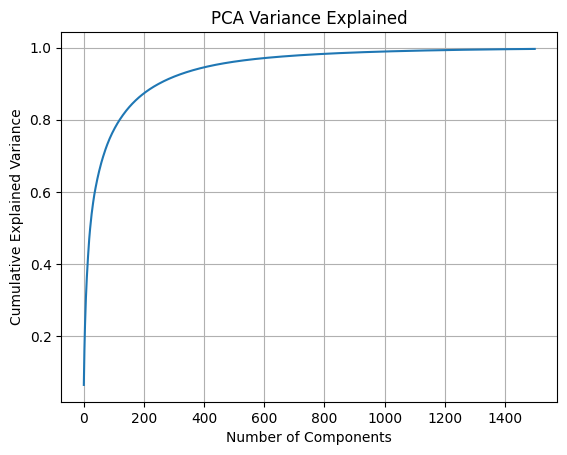

In [383]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaled = scaler.fit_transform(data.to_numpy())

# Want to see variance explained
pca = PCA(n_components=1500)
reduced = pca.fit_transform(scaled)

explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(explained_variance)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Variance Explained")
plt.grid(True)
plt.show()

In [750]:
from sklearn.manifold import TSNE
import umap
# PCA to reduce to 250 dimensions
pca = PCA(n_components=250)
X_pca = pca.fit_transform(scaled)

#tsne = TSNE(perplexity=50, random_state=42, learning_rate=10, early_exaggeration=20)
#X_tsne = tsne.fit_transform(X_pca)

# Umap
X_umap = umap.UMAP(n_neighbors=15, min_dist=0.7, random_state=42).fit_transform(X_pca)

/Users/ylvajohannebjornerstedt/Documents/myenv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


#### Find clusters

Estimated clusters: 4, noise points: 0


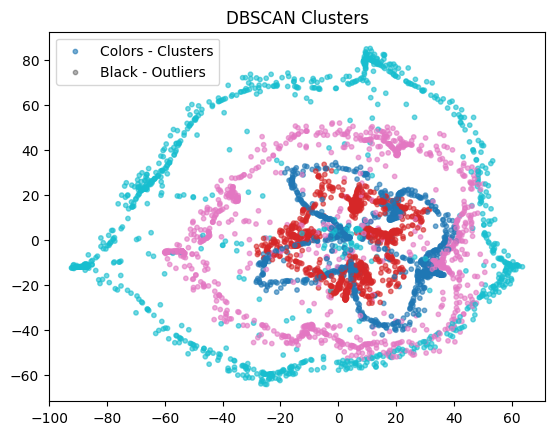

In [752]:
from sklearn.cluster import DBSCAN

# DBSCAN
dbscan = DBSCAN(eps=1, min_samples=10)
labels = dbscan.fit_predict(X_umap)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
print(f"Estimated clusters: {n_clusters}, noise points: {n_noise}")

# Plot clusters (non-outliers)
mask = labels != -1
plt.scatter(X_pca[mask, 0], X_pca[mask, 1],
            c=labels[mask], s=10, cmap='tab10', alpha=0.6, label='Colors - Clusters')

# Plot outliers (label = -1)
plt.scatter(X_pca[~mask, 0], X_pca[~mask, 1],
            c='black', s=10, alpha=0.3, label='Black - Outliers')

plt.title("DBSCAN Clusters")
plt.legend()
plt.show()

#### Creating CSV

In [ ]:
ids = data["ID"]

# Combine into a DataFrame
clusters = pd.DataFrame({
    "ID": ids,
    "cluster": labels
})

# Save to CSV
#clusters.to_csv("clusters.csv", index=False)

print(clusters['cluster'].unique())

n_noise = np.sum(labels == -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print(f"Clusters found: {n_clusters}")
print(f"Noise points: {n_noise} ({n_noise / len(labels):.2%})")

[0 1 2 3]
Clusters found: 4
Noise points: 0 (0.00%)


#### Finding Locations

In [ ]:
# Reading column names
data = pd.read_csv('unsupervised_data.csv')
data.columns


Index(['col_9858', 'col_2932', 'col_12843', 'col_5156', 'col_2677', 'col_9520',
       'col_291', 'col_14843', 'col_10287', 'col_196',
       ...
       'col_6265', 'col_5734', 'col_11284', 'col_11964', 'col_5191',
       'col_13418', 'col_5390', 'col_860', 'col_15795', 'col_7270'],
      dtype='object', length=16384)

In [885]:
# Sort columns based on name
sorted_cols = sorted(data.columns, key=lambda x: int(x.split('_')[1]), reverse=True)
sorted_data = data[sorted_cols]
print (sorted_data.columns)
print(sorted_data.shape)

Index(['col_16383', 'col_16382', 'col_16381', 'col_16380', 'col_16379',
       'col_16378', 'col_16377', 'col_16376', 'col_16375', 'col_16374',
       ...
       'col_9', 'col_8', 'col_7', 'col_6', 'col_5', 'col_4', 'col_3', 'col_2',
       'col_1', 'col_0'],
      dtype='object', length=16384)
(4000, 16384)


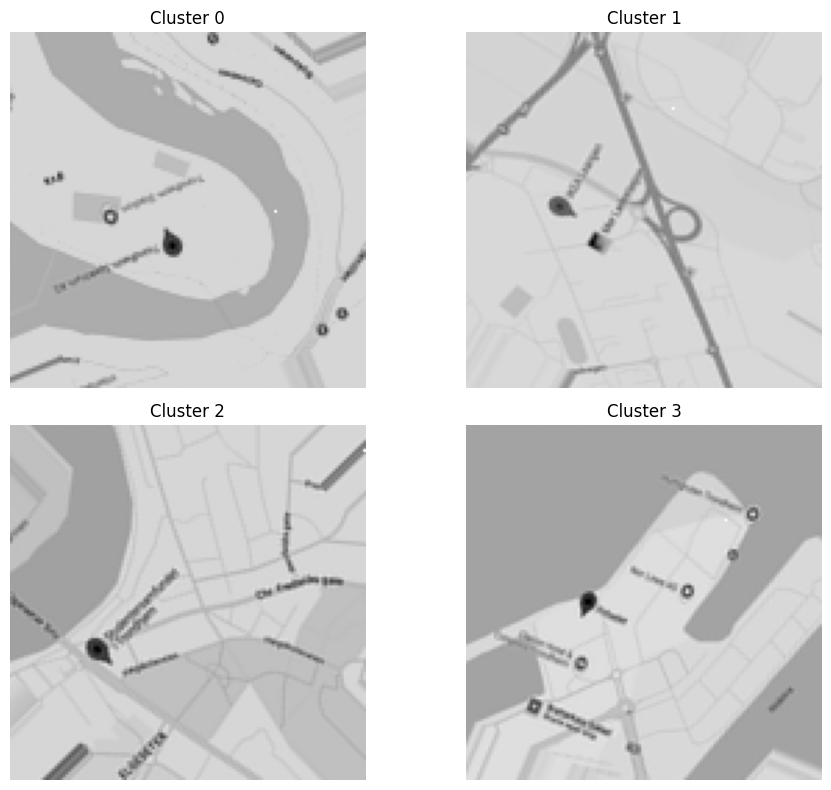

In [ ]:
cluster_groups = {}

# Create dictionary and map id to clusters
for label in clusters['cluster'].unique():
	cluster_ids = clusters[clusters['cluster'] == label]['ID'].tolist()
	cluster_groups[label] = cluster_ids
 
 
fig, ax = plt.subplots(2, 2, figsize=(10, 8))
axes = ax.ravel()

for i, cluster in enumerate(cluster_groups.keys()):
    index = cluster_groups[cluster][5] # Tried a couple different indexes to find better images
    row = sorted_data.iloc[index].to_numpy()
    
    grid = row.reshape(128, 128)
    
    # Plot
    axes[i].imshow(grid, cmap='gray')
    axes[i].set_title(f"Cluster {cluster}", fontsize=12)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

### Discussion
#### Dimensionality Reduction: Which dimensionality reduction methods helped you determine the correct number of clusters? Why did some methods work better than others? Explain the differences between PCA, t-SNE, and UMAP

PCA is a linear method to recude dimansionality, it preserves the global structure and variance if used correctly. It works by creating a plane between the points to find the best flat plane that describes the spread of the data. t-SNE on the other hand is nonlinear, and focuses on preserving the local structure. It does this by converting distances to probabilites and converging the difference between them. In comparison, UMAP is also nonlinear, but tries to preserve both local and global structure. It does this by building a graph of the nearest neighbours in high dimension, and tries to recreate this in lower dimensions.

Tried PCA first, and plotted PCA variance explained. This showed that a lot of the data was redundant and that reducing to somewhere between 300 - 600 dimensions would still keep over 90% of the variance. This did help to reduce the dimensionality and also maintain variance, but was not enough to classify the clusters with correctly with DBSCAN as it didn't focus enough on the local structure. So tried t-SNE on PCA reduced data, as t-SNE can be slower. This resulted in a stable 0.97 on the submission, but the main problem was the it could not classify the center correctly. So instead I swapped t-SNE with UMAP. I had to try a lot of different combinations, and even then, the results would vary a bit between runs with the same parameters. See below; the left is using UMAP and the right is using t-SNE.
<p float="left">
  <img src="final.png" width="45%" />
  <img src="output.png" width="45%" />
</p>

#### Clustering Approach: Which clustering algorithm and hyperparameters did you use? Discuss the differences between algorithms like KMeans and DBSCAN

KMeans is a centroid based algorithm and works by choosing K as number of clusters, and then randomly choosing the placements of the centroids. Each data point is then assigned to the closest centroid, and each cluster centroid is recalculated accordingly the its points. This is done a set number of times or until convergence. Meanwhile DBSCAN is density based, and creates clusters based on a minimum distance between points and a minimum number of points needed to form a cluster. KMeans is very sensitive to initialization as the centroids are chosen randomly, and could end up not converging or creating unnatural splits. DBSCAN on the other hand, is sensitive to its parameters and has to be tuned carefully. When it comes to the structure of the data, DBSCAN can classify different shapes while KMeans assums the clusters are spherical. 

In this case I ended up using DBSCAN with eps = 1 and min_damples = 10, as the data is not suited for KMeans and has an arbritary ring-like shape. I tried a couple different values for eps in combination with UMAP, as UMAP caused slightly different results per run, even with random seed set. 

#### Data Type Analysis: What is the hidden data type in the dataset? How does this information influence feature extraction for clustering? Can it explain why some dimensionality reduction algorithms are more effective?

The hidden data type of the dataset is that each row can be turned into a 128x128 grid that represents a location, and that the coulmns needed to be reordered correctly for the images to make sense.
As the data is not linear PCA. This is also  why neighboring columns seem to be highly correlated, as they come from adjacent points in the 128x128 grid. As the clusters likely represent geographical locations, algorithms that preserve the local neighbourhood relationships lik UMAP and t-SNE are more efficient.

#### Server Locations: Identify the server locations. List the specific facilities in Trondheim and explain how you deduced their locations.

Printed the column names and sorted them by the names. As the hints stated the rows could be reshaped to the shape (128, 128) and would represent the image of a location on a map. Then tried a couple different rows for each cluster to find images that were visible enough to make out the locations.
These are the locations:
* Trondheim spektrum
* IKEA Leangen
* Studentersamfunnet
* Pirbadet